# TAXI FARE PREDICTION

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df=pd.read_csv('TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [8]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

In [9]:
df['date_time_of_pickup'].head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [10]:
df1=df.copy()

In [11]:
import datetime
df1['Year']=df1['date_time_of_pickup'].dt.year
df1['Month']=df1['date_time_of_pickup'].dt.month
df1['Day']=df1['date_time_of_pickup'].dt.day
df1['Week_day']=df1['date_time_of_pickup'].dt.weekday
df1['Hours']=df1['date_time_of_pickup'].dt.hour

In [12]:
df1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [13]:
df1.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Year                    0
Month                   0
Day                     0
Week_day                0
Hours                   0
dtype: int64

In [14]:
df1[df1['amount']==0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
10002,26:01.0,0.0,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1,2010,2,15,0,14
27891,40:28.0,0.0,2015-05-15 21:40:28+00:00,-74.077927,40.805714,-74.077919,40.805721,1,2015,5,15,4,21
47302,13:39.0,0.0,2010-03-18 19:13:39+00:00,-73.942346,40.806269,-73.942463,40.806129,1,2010,3,18,3,19


In [15]:
df1.drop(index=[10002,27891,47302],inplace=True)

In [16]:
df1[df1['amount']==0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours


In [17]:
df1[df1['amount']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5
13032,57:10.0,-3.0,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8
28839,39:10.0,-2.5,2013-08-11 13:39:10+00:00,-73.785260,40.648442,0.000000,0.000000,1,2013,8,11,6,13
36722,19:45.0,-2.5,2015-04-30 15:19:45+00:00,-73.952187,40.790112,-73.950043,40.792839,1,2015,4,30,3,15
42337,29:46.0,-5.0,2015-03-09 10:29:46+00:00,-73.990974,40.755985,-73.980820,40.759869,1,2015,3,9,0,10


In [18]:
df1.drop(index=[2039,2486,13032,28839,36722,42337],inplace=True)

In [19]:
df1[df1['amount']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours


# EDA

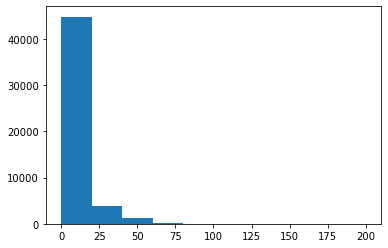

In [20]:
plt.hist(df1['amount'])
plt.show()

C:\Users\gauri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


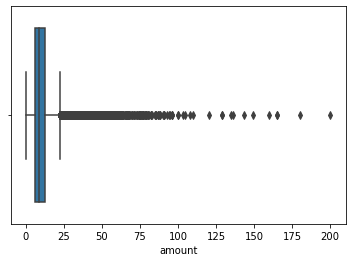

In [21]:
sns.boxplot(df1['amount'])
plt.show()

In [22]:
higher_extreme=df1['amount'].mean()+3*df1['amount'].std()
print('The higher extreme value:',higher_extreme)

The higher extreme value: 40.42078648474286


In [23]:
df1[df['amount']>40]

<ipython-input-23-9dd3ca62bf49>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df['amount']>40]


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
35,15:38.0,58.00,2015-01-11 03:15:38+00:00,-73.983330,40.738720,-73.933197,40.847225,1,2015,1,11,6,3
105,08:52.0,52.00,2009-03-25 00:08:52+00:00,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0
132,14:00.0,49.57,2009-09-22 21:14:00+00:00,-73.977023,40.752600,-73.790310,40.643783,2,2009,9,22,1,21
147,19:00.0,52.50,2014-05-13 22:19:00+00:00,-73.982265,40.762062,-73.768550,40.675135,1,2014,5,13,1,22
204,07:00.0,42.50,2011-01-10 16:07:00+00:00,-73.795677,40.807722,-73.978683,40.724365,2,2011,1,10,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49817,37:18.0,45.50,2014-04-07 07:37:18+00:00,-73.789663,40.646879,-73.933732,40.745231,1,2014,4,7,0,7
49920,24:02.0,43.33,2013-06-25 15:24:02+00:00,-73.982455,40.763912,-73.885527,40.773238,1,2013,6,25,1,15
49948,28:05.0,57.33,2014-11-13 06:28:05+00:00,-73.790318,40.646655,-73.984705,40.744271,1,2014,11,13,3,6
49961,47:17.0,48.83,2015-02-16 06:47:17+00:00,-73.997513,40.680462,-73.940933,40.839779,1,2015,2,16,0,6


In [24]:
df1[df['amount']<40]

<ipython-input-24-7ea15c88037d>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[df['amount']<40]


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [25]:
df2=df1[df1['amount']<40]

In [26]:
df2

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,2013,6,12,2,23
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,2015,6,22,0,17
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2011,1,30,6,4
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,2012,11,6,1,7


In [27]:
df2[df2['amount']>40]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours


In [28]:
df2[df2['no_of_passenger']==0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
314,16:15.0,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0,2015,6,2,1,23
566,33:18.0,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0,2012,1,28,5,21
678,24:20.0,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0,2012,2,27,0,7
1160,58:48.0,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0,2011,5,25,2,23
1935,09:28.0,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0,2011,10,23,6,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10+00:00,-73.988813,40.731228,-73.954773,40.733567,0,2012,4,3,1,22
47401,41:22.0,9.7,2012-03-08 12:41:22+00:00,-73.991375,40.732217,-73.976507,40.758900,0,2012,3,8,3,12
47920,45:00.0,5.3,2012-03-11 18:45:00+00:00,-73.966112,40.794478,-73.953933,40.787287,0,2012,3,11,6,18
48118,56:28.0,8.1,2011-03-25 19:56:28+00:00,-73.973382,40.743915,-73.948883,40.777647,0,2011,3,25,4,19


In [29]:
df3=df2[df2['no_of_passenger']>0]

In [30]:
df3[df3['no_of_passenger']<0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours


In [31]:
df3.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Week_day,Hours
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


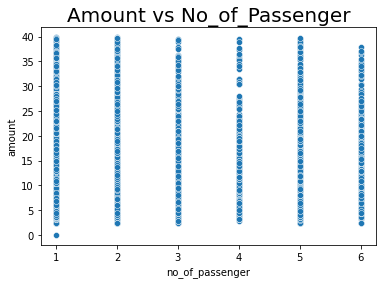

In [32]:
sns.scatterplot(x=df3['no_of_passenger'],y=df3['amount'])
plt.title('Amount vs No_of_Passenger',size=20)
plt.show()

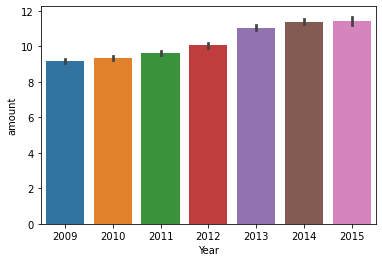

In [33]:
sns.barplot(x=df3['Year'],y=df3['amount'])
plt.show()

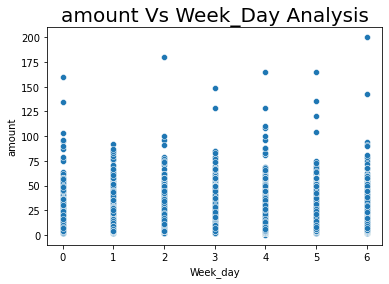

In [34]:
sns.scatterplot(x=df1['Week_day'],y=df1['amount'])
plt.title('amount Vs Week_Day Analysis',size=20)
plt.show()

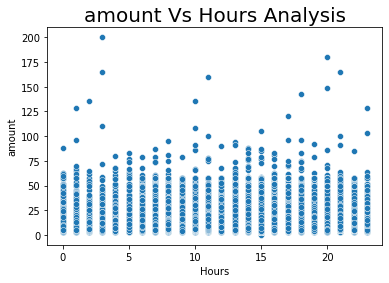

In [35]:
sns.scatterplot(x=df1['Hours'],y=df1['amount'])
plt.title('amount Vs Hours Analysis',size=20)
plt.show()

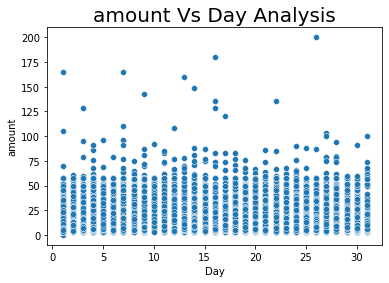

In [36]:
sns.scatterplot(x=df1['Day'],y=df1['amount'])
plt.title('amount Vs Day Analysis',size=20)
plt.show()

In [37]:
X=df3.drop(['amount','unique_id','date_time_of_pickup'],axis=1)
y=df3.amount.values
print(X.shape)
print(y.shape)

(48444, 10)
(48444,)


In [38]:
df3.to_csv('Taxi Predictiom New Data.csv')

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(38755, 10) (38755,)
(9689, 10) (9689,)


# RANDOM FOREST REGRESSOR

In [40]:
#start model building
#n_estimator =100,max_depth=8,random_state=10
#max_depth=12,n_estimator=80,random state=35
model_rf=RandomForestRegressor(max_depth=12,n_estimators=80,random_state=35,ccp_alpha=0.05)
model_rf.fit(X_train,y_train)

RandomForestRegressor(ccp_alpha=0.05, max_depth=12, n_estimators=80,
                      random_state=35)

In [41]:
#Prediction
y_pred=model_rf.predict(X_test)

In [42]:
#Checking r2Score
accuracy_rf_train=r2_score(y_train,model_rf.predict(X_train))
accuracy_rf_test=r2_score(y_test,y_pred)
rmse_test=mean_squared_error(y_test,y_pred)
print(accuracy_rf_train)
print(accuracy_rf_test)
print(rmse_test)

0.6675570370775885
0.6497030224763493
14.462988901823834


In [43]:
def metrics (y_actual,y_pred):
    r2= r2_score(y_actual,y_pred)
    rmse=np.sqrt(mean_squared_error(y_actual,y_pred))
    print('r2_value: {}| rmse_value:{}'.format(round(r2,2),round(rmse,2)))

# Linear Regression (model fit)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [47]:
print('Train Set:')
metrics(y_train,y_pred_train)
print('Test Set:')
metrics(y_test,y_pred_test)

Train Set:
r2_value: 0.02| rmse_value:6.33
Test Set:
r2_value: 0.02| rmse_value:6.37
